In [1]:
import pandas as pd
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [26]:
# Loading the earthquake data
df = pd.read_csv('https://raw.githubusercontent.com/ravij25/turkey-earth-quake-prediction/main/Catalogue.csv')


In [27]:
data = pd.DataFrame(list(df['Magnitude']), index=df['Date'])

In [28]:
df= df.sort_values(by="Date")

In [29]:
df

,Index,Date,Time (UTC),Latitude,Longitude,Depth,Type,Magnitude
12064,12065,1/1/1904,11:38:00 AM,37.8000,29.1000,20.00,MS,4.8
12063,12064,1/1/1904,10:00:00 PM,38.8300,38.6900,10.00,MS,5.0
10880,10881,1/1/1953,10:17:22 AM,35.6800,26.1300,40.00,MS,4.8
9741,9742,1/1/1969,9:41:29 PM,36.4600,23.1000,47.00,mb,4.4
9243,9244,1/1/1971,8:11:33 PM,34.5724,25.5741,57.70,mb,4.0
...,...,...,...,...,...,...,...,...
1590,1591,9/9/2012,7:26:06 AM,36.8500,24.4700,122.00,mb,4.3
947,948,9/9/2016,5:24:19 PM,36.7788,25.2975,7.26,Mw,4.2
595,596,9/9/2018,11:54:00 PM,35.0610,45.6060,15.00,Mw,4.2
458,459,9/9/2019,9:56:00 AM,38.5275,44.2438,21.26,Mw,4.3


In [30]:
data = pd.DataFrame(list(df['Magnitude']), index=df['Date'], columns=['Magnitude'])

In [31]:
data

,Magnitude
Date,
1/1/1904,4.8
1/1/1904,5.0
1/1/1953,4.8
1/1/1969,4.4
1/1/1971,4.0
...,...
9/9/2012,4.3
9/9/2016,4.2
9/9/2018,4.2


In [32]:
df=data[:365]

In [33]:
df.shape

(365, 1)

In [34]:
df.isnull().sum()

Magnitude    0
dtype: int64

In [35]:
df=df.dropna(axis=0)

In [36]:
df.shape

(365, 1)

In [37]:
df=df['Magnitude'].values

In [39]:
df[:5]

array([4.8, 5. , 4.8, 4.4, 4. ])

In [40]:
df=df.reshape(-1,1)

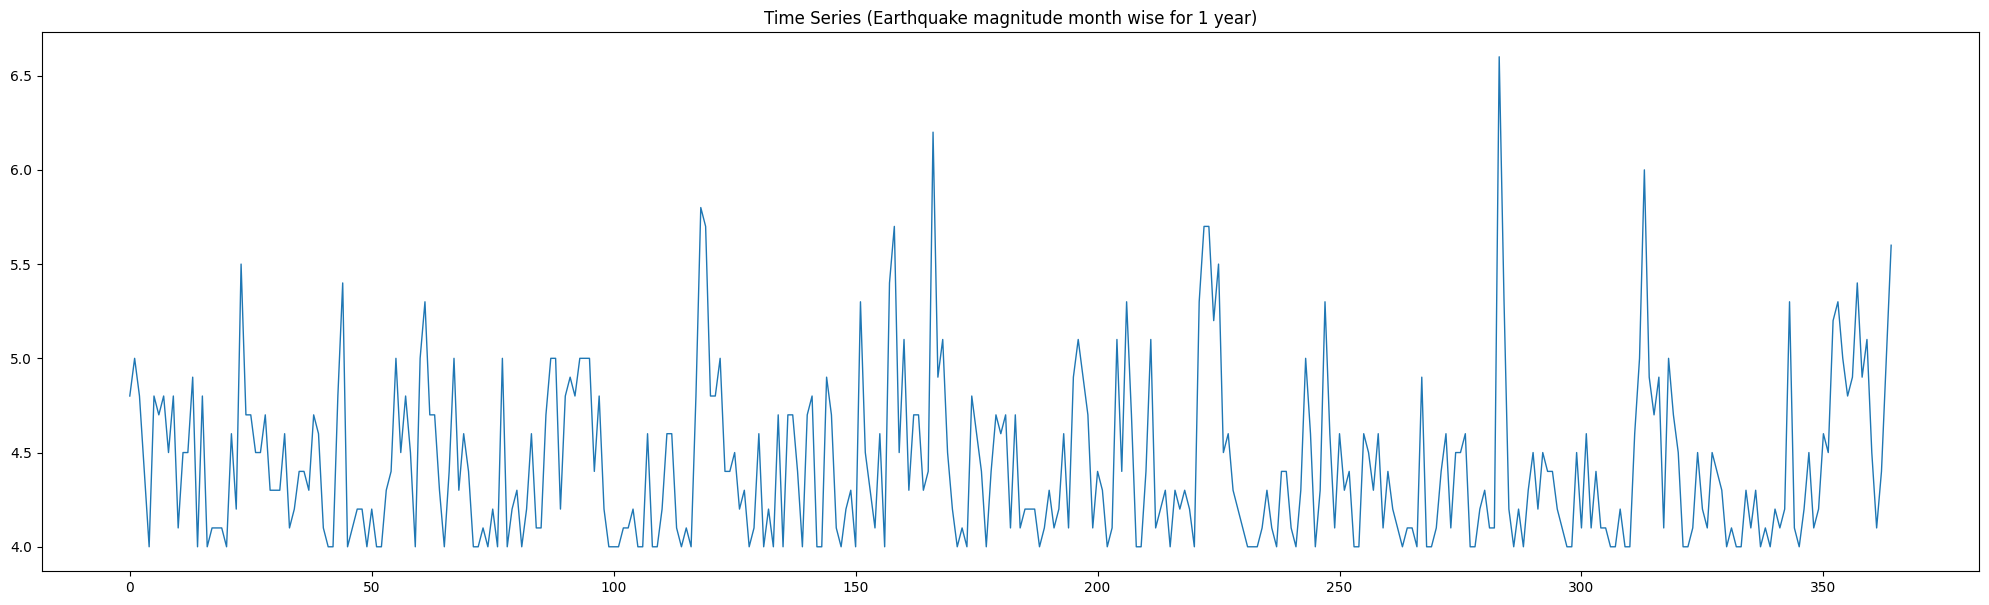

In [42]:
plt.figure(figsize=(25, 7))
plt.plot(df, linewidth=1)
# plt.grid()
plt.title("Time Series (Earthquake magnitude month wise for 1 year)")
plt.show()

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df)

In [44]:
data_scaled[:5]

array([[0.30769231],
       [0.38461538],
       [0.30769231],
       [0.15384615],
       [0.        ]])

In [45]:
data_scaled.shape

(365, 1)

In [46]:
steps= 20
inp = []
out = []
for i in range(len(data_scaled) - (steps)):
    inp.append(data_scaled[i:i+steps])
    out.append(data_scaled[i+steps])

In [47]:
out[:10]

[array([0.]),
 array([0.23076923]),
 array([0.07692308]),
 array([0.57692308]),
 array([0.26923077]),
 array([0.26923077]),
 array([0.19230769]),
 array([0.19230769]),
 array([0.26923077]),
 array([0.11538462])]

In [48]:
import numpy as np

In [49]:
inp= np.asanyarray(inp)
out= np.asanyarray(out)

In [50]:
len(df)*0.65

237.25

In [51]:
x_train = inp[:237,:,:]
x_test = inp[237:,:,:]    
y_train = out[:237]    
y_test= out[237:]

In [52]:
inp.shape

(345, 20, 1)

In [53]:
x_train.shape

(237, 20, 1)

In [54]:
x_test.shape

(108, 20, 1)

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

In [56]:
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape= (20,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape= (20,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [58]:
model.fit(x_train,y_train,epochs=300, verbose=1, )

Epoch 1/300
8/8 [==============================] - 7s 35ms/step - loss: 0.0369
Epoch 2/300
8/8 [==============================] - 0s 34ms/step - loss: 0.0303
Epoch 3/300
8/8 [==============================] - 0s 34ms/step - loss: 0.0297
Epoch 4/300
8/8 [==============================] - 0s 34ms/step - loss: 0.0281
Epoch 5/300
8/8 [==============================] - 0s 36ms/step - loss: 0.0283
Epoch 6/300
8/8 [==============================] - 0s 33ms/step - loss: 0.0284
Epoch 7/300
8/8 [==============================] - 0s 33ms/step - loss: 0.0280
Epoch 8/300
8/8 [==============================] - 0s 36ms/step - loss: 0.0276
Epoch 9/300
8/8 [==============================] - 0s 35ms/step - loss: 0.0273
Epoch 10/300
8/8 [==============================] - 0s 33ms/step - loss: 0.0269
Epoch 11/300
8/8 [==============================] - 0s 32ms/step - loss: 0.0265
Epoch 12/300
8/8 [==============================] - 0s 35ms/step - loss: 0.0259
Epoch 13/300
8/8 [==============================]

In [59]:
# model.evaluate(x_test, y_test)


In [61]:
#Predictions and Model evaluation
#Predictions on training set#

In [62]:
print("Predicted Value",model.predict(x_train)[4][0])
print("Expected value",y_train[4][0])

8/8 [==============================] - 2s 11ms/step
Predicted Value 0.05409514
Expected value 0.2692307692307694


In [63]:
predictions=model.predict(x_test)

4/4 [==============================] - 0s 10ms/step


In [64]:
print("Predicted Value",predictions[2][0])
print("Expected Value",y_test[2][0])

Predicted Value 0.061690066
Expected Value 0.038461538461538325


In [65]:
predictions.shape

(108, 1)

In [66]:
y_test.shape

(108, 1)

In [67]:
pred_df=pd.DataFrame(predictions)

In [68]:
pred_df['TrueValues']=y_test

In [69]:
pred_df_new = pred_df.rename(columns={ 0: 'Predictions'})

In [70]:
pred_df_new

,Predictions,TrueValues
0,0.076017,0.115385
1,0.086217,0.230769
2,0.061690,0.038462
3,0.155760,0.153846
4,0.245081,0.076923
...,...,...
103,0.233476,0.192308
104,0.204806,0.038462
105,0.133394,0.153846
106,0.051653,0.384615


Text(0.5, 1.0, 'Predictions VS True Values on Testing Set')

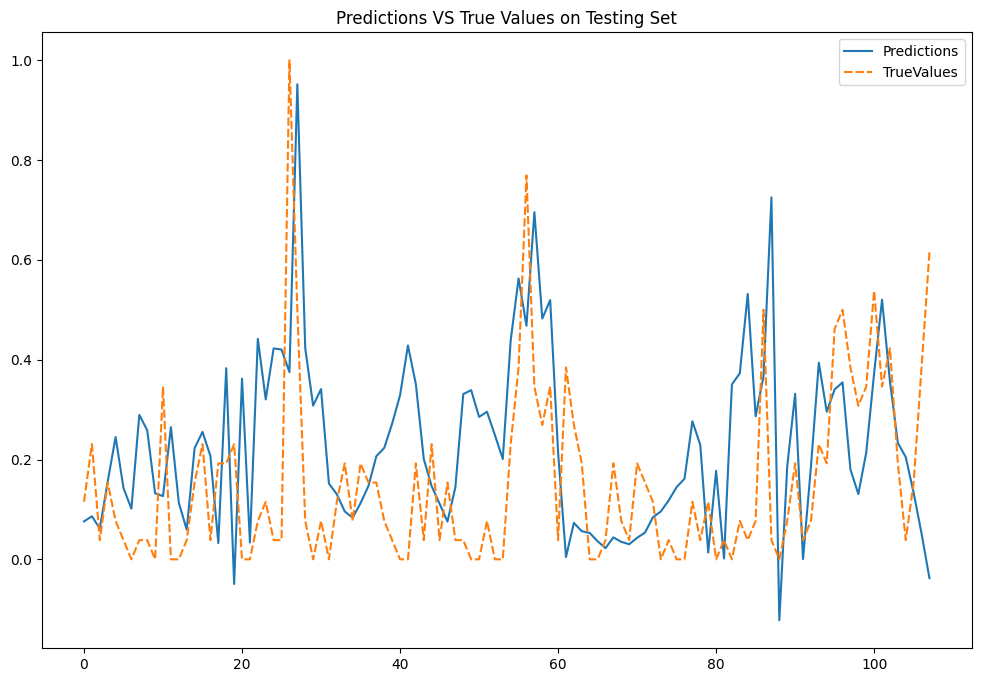

In [71]:
plt.figure(figsize=(12,8))
sns.lineplot(data= pred_df_new)
plt.title("Predictions VS True Values on Testing Set")